## Alternus Vera
Dataset: Politifact/Liar-Liar dataset(https://www.politifact.com)

Description of the train TSV file format:

- Column 1: the ID of the statement ([ID].json)
- Column 2: the label.
- Column 3: the statement.
- Column 4: the subject(s).
- Column 5: the speaker.
- Column 6: the speaker's job title.
- Column 7: the state info.
- Column 8: the party affiliation.
- Column 9-13: the total credit history count, including the current statement.
  - 9: barely true counts.
  - 10: false counts.
  - 11: half true counts.
  - 12: mostly true counts.
  - 13: pants on fire counts.
- Column 14: the context (venue / location of the speech or statement).

------------------------
- Data Preparation
- Data exploration
- Stemming and tokenization
- Tf-Idf
- Sentiment Analysis
- LDA
- LDA Score calculation and topic inferance 
**Added tf-idf on bag of words, sentiment analysis, score calculation LDA (on bag of words and tf-idf) and comparision

-----------------------------
link to team repo:https://github.com/cpati/team-hvac

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df =pd.read_csv('../../liar-liar_dataset/train.tsv', sep='\t')

In [3]:
#df.head(10)

In [4]:
df.shape

(10240, 14)

In [5]:
df.columns

Index(['file', 'value', 'statement', 'topic', 'name', 'occupation', 'state',
       'party', 'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'context '],
      dtype='object')

##### Data exploration

In [6]:
#df['state'].value_counts()

In [7]:
df['party'].unique()

array(['republican', 'democrat', 'none', 'organization', 'independent',
       'columnist', 'activist', 'talk-show-host', 'libertarian',
       'newsmaker', 'journalist', 'labor-leader', 'state-official',
       'business-leader', 'education-official', 'tea-party-member', nan,
       'green', 'liberal-party-canada', 'government-body', 'Moderate',
       'democratic-farmer-labor', 'ocean-state-tea-party-action',
       'constitution-party'], dtype=object)

In [8]:
df.loc[df['topic']=='health-care']

file        value  \
3       1123.json        FALSE   
14      8705.json  barely-true   
25     10215.json        FALSE   
85      2044.json    half-true   
92      2020.json  mostly-true   
165     4504.json  barely-true   
248    11772.json        FALSE   
314     8308.json  barely-true   
350     9031.json        FALSE   
389     5631.json        FALSE   
434     9434.json  barely-true   
442     5629.json        FALSE   
516     3097.json         TRUE   
541     8510.json   pants-fire   
582     2328.json    half-true   
612     1100.json  mostly-true   
619     7788.json    half-true   
707     2302.json    half-true   
731     1630.json  mostly-true   
768     1149.json        FALSE   
772     1509.json  mostly-true   
878    11576.json    half-true   
915    13424.json        FALSE   
929     4512.json        FALSE   
955      786.json        FALSE   
997     3712.json  mostly-true   
1001     262.json  barely-true   
1035    9984.json    half-true   
1038    5651.json        FALSE   
1046    4125.json        FALSE   
...           ...          ...   
9525    8926.json    half-true   
9534    8431.json        FALSE   
9553    1723.json  barely-true   
9569    8593.json        FALSE   
9581    1751.json        FALSE   
9594    5598.json        FALSE   
9673    8313.json    half-true   
9701    1300.json        FALSE   
9720    8512.json   pants-fire   
9727    1127.json    half-true   
9759    8459.json  barely-true   
9776    4465.json  barely-true   
9798     730.json    half-true   
9804    1205.json        FALSE   
9817    1256.json         TRUE   
9843     155.json        FALSE   
9856    1023.json        FALSE   
9872    1166.json  barely-true   
9875    2303.json    half-true   
9882    3680.json  mostly-true   
9896    8330.json  mostly-true   
9954    3070.json        FALSE   
9975    3762.json    half-true   
9985    1281.json         TRUE   
10000   1536.json  mostly-true   
10005   1176.json         TRUE   
10061   1126.json   pants-fire   
10122   8627.json    half-true   
10207   6178.json        FALSE   
10214   4216.json        FALSE   

                                               statement        topic  \
3      Health care reform legislation is likely to ma...  health-care   
14     Most of the (Affordable Care Act) has already ...  health-care   
25                 I dont know who (Jonathan Gruber) is.  health-care   
85     In Rick Perrys Texas, we import nurses ... fro...  health-care   
92     The insurance commissioner cant do squat about...  health-care   
165    Says Rick Perry wrote a letter supporting Hill...  health-care   
248    We now have driven (health care) costs down to...  health-care   
314    The American people support defunding Obamacar...  health-care   
350    Most young Americans right now, theyre not cov...  health-care   
389    Says Congressman Bill Pascrell voted to remove...  health-care   
434    Jason Carter supports using Georgia tax dollar...  health-care   
442    New federal projections estimate that the heal...  health-care   
516    Texas leads the nation in the percentage of re...  health-care   
541    What we said was, you can keep (your plan) if ...  health-care   
582    Charlie Crist has six different positions on O...  health-care   
612    14,000 Americans . . . lose their health insur...  health-care   
619    The Affordable Care Act is bringing the cost o...  health-care   
707    We spend more money on health care per capita ...  health-care   
731    The American people will be appalled to learn ...  health-care   
768    We spend twice as much per capita on health ca...  health-care   
772    One of the most recent polls said 75 percent o...  health-care   
878    The United States is the only major country on...  health-care   
915    Prior to Obamacare here in Wisconsin, 95 perce...  health-care   
929    If we had been on Obamacare and a bureaucrat w...  health-care   
955    Barack Obama's plan calls for "mandates and fi...  health-care   
997   

In [9]:
df.isnull().sum()

file                       0
value                      0
statement                  0
topic                      2
name                       2
occupation              2897
state                   2208
party                      2
barely true counts         2
false counts               2
half true counts           2
mostly true counts         2
pants on fire counts       2
context                  102
dtype: int64

### Data Cleaning
    Tokenizing: converting a document to its atomic elements.
    Stopping: removing meaningless words.
    Stemming: merging words that are equivalent in meaning.

In [10]:
df1 =df.drop(columns=['file','value' ,'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',])

In [11]:
print (df1)

                                               statement  \
0      Says the Annies List political group supports ...   
1      When did the decline of coal start? It started...   
2      Hillary Clinton agrees with John McCain "by vo...   
3      Health care reform legislation is likely to ma...   
4      The economic turnaround started at the end of ...   
5      The Chicago Bears have had more starting quart...   
6      Jim Dunnam has not lived in the district he re...   
7      I'm the only person on this stage who has work...   
8      However, it took $19.5 million in Oregon Lotte...   
9      Says GOP primary opponents Glenn Grothman and ...   
10     For the first time in history, the share of th...   
11     Since 2000, nearly 12 million Americans have s...   
12     When Mitt Romney was governor of Massachusetts...   
13     The economy bled $24 billion due to the govern...   
14     Most of the (Affordable Care Act) has already ...   
15     In this last election in November

In [12]:
raw =df1[['statement']]
raw[:5]
final=raw.values.T.tolist()
print (len(final[0]))

10240


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidhsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
## porter stemmer
def textProcessing(doc):
    process = re.sub('[^a-zA-Z]', ' ',doc) 
    process = process.lower()
    process = process.split()
    ps = PorterStemmer()
    process = [ps.stem(word) for word in process if not word in set(stopwords.words('english'))]
    process = ' '.join(process)
    return process

In [15]:
print('original document: ')
words = []
for word in final:
    words.append(word)
print (words)



original document: 
[['Says the Annies List political group supports third-trimester abortions on demand.', 'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.', 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."', 'Health care reform legislation is likely to mandate free sex change surgeries.', 'The economic turnaround started at the end of my term.', 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.', 'Jim Dunnam has not lived in the district he represents for years now.', "I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.", 'However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the 

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidhsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
result =[]
for i in final[0]:
    result.append(textProcessing(i))
print (result)

['say anni list polit group support third trimest abort demand', 'declin coal start start natur ga took start begin presid georg w bush administr', 'hillari clinton agre john mccain vote give georg bush benefit doubt iran', 'health care reform legisl like mandat free sex chang surgeri', 'econom turnaround start end term', 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad', 'jim dunnam live district repres year', 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg', 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif', 'say gop primari oppon glenn grothman joe leibham cast compromis vote cost million higher electr cost', 'first time histori share nation popular vote margin smaller latino vote margin', 'sinc nearli million american slip middl class poverti', 'mitt romney governor massachusett didnt slow rate growth govern actual cut', 'economi bled billion due

### N grams using count vectorization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer 

In [19]:
for i in df['statement']:
    vectorizer = CountVectorizer(ngram_range=(1,6))
    analyzer = vectorizer.build_analyzer()
    print (analyzer(i))

['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand', 'says the', 'the annies', 'annies list', 'list political', 'political group', 'group supports', 'supports third', 'third trimester', 'trimester abortions', 'abortions on', 'on demand', 'says the annies', 'the annies list', 'annies list political', 'list political group', 'political group supports', 'group supports third', 'supports third trimester', 'third trimester abortions', 'trimester abortions on', 'abortions on demand', 'says the annies list', 'the annies list political', 'annies list political group', 'list political group supports', 'political group supports third', 'group supports third trimester', 'supports third trimester abortions', 'third trimester abortions on', 'trimester abortions on demand', 'says the annies list political', 'the annies list political group', 'annies list political group supports', 'list political group supports third', 'political grou

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### tokenization the words

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [21]:
final=[]
for i in result:
    tokens = tokenizer.tokenize(i)
    final.append(tokens)
print (final)



[['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand'], ['declin', 'coal', 'start', 'start', 'natur', 'ga', 'took', 'start', 'begin', 'presid', 'georg', 'w', 'bush', 'administr'], ['hillari', 'clinton', 'agre', 'john', 'mccain', 'vote', 'give', 'georg', 'bush', 'benefit', 'doubt', 'iran'], ['health', 'care', 'reform', 'legisl', 'like', 'mandat', 'free', 'sex', 'chang', 'surgeri'], ['econom', 'turnaround', 'start', 'end', 'term'], ['chicago', 'bear', 'start', 'quarterback', 'last', 'year', 'total', 'number', 'tenur', 'uw', 'faculti', 'fire', 'last', 'two', 'decad'], ['jim', 'dunnam', 'live', 'district', 'repres', 'year'], ['person', 'stage', 'work', 'activ', 'last', 'year', 'pass', 'along', 'russ', 'feingold', 'toughest', 'ethic', 'reform', 'sinc', 'waterg'], ['howev', 'took', 'million', 'oregon', 'lotteri', 'fund', 'port', 'newport', 'eventu', 'land', 'new', 'noaa', 'marin', 'oper', 'center', 'pacif'], ['say', 'gop', 'primari', 'oppon', 'glenn', 'g

### adding all the sentence token's in one list

In [22]:
import itertools
flat=itertools.chain.from_iterable(final)
text = list(flat)


In [23]:
from gensim import corpora, models

In [24]:
dictionary = corpora.Dictionary(final)
print (dictionary)

Dictionary(7696 unique tokens: ['abort', 'anni', 'demand', 'group', 'list']...)


In [25]:
import numpy as np
final=np.asarray(final)
raw1 = np.concatenate(final).ravel().tolist()
raw1

['say',
 'anni',
 'list',
 'polit',
 'group',
 'support',
 'third',
 'trimest',
 'abort',
 'demand',
 'declin',
 'coal',
 'start',
 'start',
 'natur',
 'ga',
 'took',
 'start',
 'begin',
 'presid',
 'georg',
 'w',
 'bush',
 'administr',
 'hillari',
 'clinton',
 'agre',
 'john',
 'mccain',
 'vote',
 'give',
 'georg',
 'bush',
 'benefit',
 'doubt',
 'iran',
 'health',
 'care',
 'reform',
 'legisl',
 'like',
 'mandat',
 'free',
 'sex',
 'chang',
 'surgeri',
 'econom',
 'turnaround',
 'start',
 'end',
 'term',
 'chicago',
 'bear',
 'start',
 'quarterback',
 'last',
 'year',
 'total',
 'number',
 'tenur',
 'uw',
 'faculti',
 'fire',
 'last',
 'two',
 'decad',
 'jim',
 'dunnam',
 'live',
 'district',
 'repres',
 'year',
 'person',
 'stage',
 'work',
 'activ',
 'last',
 'year',
 'pass',
 'along',
 'russ',
 'feingold',
 'toughest',
 'ethic',
 'reform',
 'sinc',
 'waterg',
 'howev',
 'took',
 'million',
 'oregon',
 'lotteri',
 'fund',
 'port',
 'newport',
 'eventu',
 'land',
 'new',
 'noaa',
 '

### Bag of words
to measure the frequency 

In [26]:
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(result) for result in final]
print (bow_corpus[50])



[(4, 1), (34, 1), (90, 1), (91, 1), (93, 1), (275, 1), (276, 1), (277, 1), (278, 1)]


### TF-IDF on Bag of words
to measure the relevance of the words

In [27]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


In [28]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.35904583507755133),
 (1, 0.43205352296640565),
 (2, 0.490320729707899),
 (3, 0.4306640399228395),
 (4, 0.12019203984807553),
 (5, 0.2874852011836854),
 (6, 0.40179104146231087)]


### LDA Model on bag of words

In [29]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
np.random.seed(2018)

In [30]:
lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word = dictionary, passes=2)

In [31]:
print (lda_model)

LdaModel(num_terms=968, num_topics=10, decay=0.5, chunksize=2000)


In [32]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.126*"percent" + 0.041*"tax" + 0.027*"rate" + 0.024*"year" + 0.017*"incom" + 0.017*"pay" + 0.015*"american" + 0.015*"sinc" + 0.014*"top" + 0.013*"say"
Topic: 1 
Words: 0.049*"job" + 0.025*"state" + 0.022*"peopl" + 0.017*"creat" + 0.016*"get" + 0.016*"offic" + 0.015*"new" + 0.013*"health" + 0.013*"insur" + 0.013*"busi"
Topic: 2 
Words: 0.053*"vote" + 0.031*"say" + 0.026*"bill" + 0.022*"democrat" + 0.021*"support" + 0.018*"u" + 0.018*"john" + 0.016*"allow" + 0.016*"even" + 0.016*"mccain"
Topic: 3 
Words: 0.033*"say" + 0.025*"illeg" + 0.025*"immigr" + 0.024*"texa" + 0.023*"trump" + 0.022*"state" + 0.021*"one" + 0.020*"wage" + 0.020*"donald" + 0.016*"law"
Topic: 4 
Words: 0.053*"year" + 0.025*"state" + 0.023*"million" + 0.018*"peopl" + 0.018*"two" + 0.018*"got" + 0.016*"last" + 0.015*"work" + 0.013*"wisconsin" + 0.013*"everi"
Topic: 5 
Words: 0.051*"presid" + 0.039*"obama" + 0.024*"ever" + 0.021*"say" + 0.021*"state" + 0.019*"time" + 0.018*"bush" + 0.017*"debt" + 0.015*"f

10 topics:
- tax rate
- job
- voting for bill 
- immigration
- President Obama
- school fund
- tax on health care

#### Score calculation

In [33]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.47892361879348755	 
Topic: 0.053*"vote" + 0.031*"say" + 0.026*"bill" + 0.022*"democrat" + 0.021*"support" + 0.018*"u" + 0.018*"john" + 0.016*"allow" + 0.016*"even" + 0.016*"mccain"

Score: 0.19224534928798676	 
Topic: 0.056*"say" + 0.022*"republican" + 0.020*"budget" + 0.020*"secur" + 0.020*"state" + 0.018*"billion" + 0.017*"cut" + 0.016*"rick" + 0.016*"clinton" + 0.016*"democrat"

Score: 0.17535533010959625	 
Topic: 0.051*"presid" + 0.039*"obama" + 0.024*"ever" + 0.021*"say" + 0.021*"state" + 0.019*"time" + 0.018*"bush" + 0.017*"debt" + 0.015*"first" + 0.015*"unit"

Score: 0.1073104590177536	 
Topic: 0.045*"say" + 0.034*"school" + 0.034*"fund" + 0.028*"public" + 0.027*"romney" + 0.025*"state" + 0.023*"student" + 0.020*"educ" + 0.020*"mitt" + 0.015*"would"


### LDA Model on tf -idf

In [34]:
lda_model_tfidf  = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=10, id2word = dictionary, passes=2)

In [35]:
print (lda_model)

LdaModel(num_terms=968, num_topics=10, decay=0.5, chunksize=2000)


In [36]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.126*"percent" + 0.041*"tax" + 0.027*"rate" + 0.024*"year" + 0.017*"incom" + 0.017*"pay" + 0.015*"american" + 0.015*"sinc" + 0.014*"top" + 0.013*"say"
Topic: 1 
Words: 0.049*"job" + 0.025*"state" + 0.022*"peopl" + 0.017*"creat" + 0.016*"get" + 0.016*"offic" + 0.015*"new" + 0.013*"health" + 0.013*"insur" + 0.013*"busi"
Topic: 2 
Words: 0.053*"vote" + 0.031*"say" + 0.026*"bill" + 0.022*"democrat" + 0.021*"support" + 0.018*"u" + 0.018*"john" + 0.016*"allow" + 0.016*"even" + 0.016*"mccain"
Topic: 3 
Words: 0.033*"say" + 0.025*"illeg" + 0.025*"immigr" + 0.024*"texa" + 0.023*"trump" + 0.022*"state" + 0.021*"one" + 0.020*"wage" + 0.020*"donald" + 0.016*"law"
Topic: 4 
Words: 0.053*"year" + 0.025*"state" + 0.023*"million" + 0.018*"peopl" + 0.018*"two" + 0.018*"got" + 0.016*"last" + 0.015*"work" + 0.013*"wisconsin" + 0.013*"everi"
Topic: 5 
Words: 0.051*"presid" + 0.039*"obama" + 0.024*"ever" + 0.021*"say" + 0.021*"state" + 0.019*"time" + 0.018*"bush" + 0.017*"debt" + 0.015*"f

10 topics:
- tax
- sex
- wage
- college 
- train
- job
- health care
- Donald Trump
- oil tax

#### Score calculation

In [37]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))




Score: 0.5462357401847839	 
Topic: 0.024*"health" + 0.023*"care" + 0.018*"insur" + 0.013*"compani" + 0.012*"walker" + 0.012*"job" + 0.012*"scott" + 0.012*"oil" + 0.012*"ga" + 0.011*"employe"

Score: 0.296714723110199	 
Topic: 0.014*"largest" + 0.013*"food" + 0.013*"john" + 0.012*"democrat" + 0.011*"board" + 0.011*"presid" + 0.011*"say" + 0.010*"member" + 0.010*"despit" + 0.010*"vote"

Score: 0.1031959056854248	 
Topic: 0.020*"job" + 0.016*"state" + 0.014*"percent" + 0.013*"wisconsin" + 0.012*"new" + 0.012*"measur" + 0.012*"california" + 0.012*"year" + 0.011*"florida" + 0.011*"lose"


### Sentiment Analysis

polarity: negative, neutral, positive, compound
polarity annotations in output: 
- negative - neg
- neutral - neu
- positive - pos
- compound - compound

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [39]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print("{}{}".format(sentence, str(score)))
    return score

In [40]:
polarity=[]
for i in df['statement']:
    result = (sentiment_analyzer_scores(i))
    polarity.append(result)
    print (i)
    print (result)
    print ("")
    

Says the Annies List political group supports third-trimester abortions on demand.
{'neg': 0.115, 'neu': 0.692, 'pos': 0.192, 'compound': 0.25}

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.3612}

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
{'neg': 0.107, 'neu': 0.687, 'pos': 0.206, 'compound': 0.3182}

Health care reform legislation is likely to mandate free sex change surgeries.
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}

The economic turnaround started at the end of my term.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
{'neg': 0.12, 'neu': 0.836, 'pos': 0.043, 'compound': -0.5106}

Jim Dunnam


Shes voted for 60 tax increases, hurting the middle class and small businesses.
{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.4019}

Now, in the House of Representatives, we have 40 different jobs bills that have passed and almost all of them have been bipartisan.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sheila Jackson Lee of Texas said: Hey, all you wrinkly, white-aged has-beens: Its time for you to die and let the next generation have your spot on the planet.
{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.5994}

Republican (small business tax cut) bill spends $80 million for better Google searches, not job creation
{'neg': 0.097, 'neu': 0.748, 'pos': 0.155, 'compound': 0.27}

A 2013 state law would allow the operator of an iron ore mine in northern Wisconsin to fill in pristine streams and ponds with mine waste.
{'neg': 0.101, 'neu': 0.83, 'pos': 0.069, 'compound': -0.2263}

America is one of the highest-taxed nations in the world.
{'neg': 0.0, 'neu'

An independent payment advisory board created by in the health care reform law is like a Medicare IRS with the power to cut Medicare in order to pay for new government programs.
{'neg': 0.094, 'neu': 0.699, 'pos': 0.207, 'compound': 0.6369}

The Mitchell Park Domes lose about $1 million-plus every year and the number of people going to the Domes has been going down.
{'neg': 0.108, 'neu': 0.84, 'pos': 0.052, 'compound': -0.34}

Under a bill before the legislature, youd have to go to court to fire an employee.
{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.34}

There is little if any evidence that the use of red light cameras in New Jersey has reduced the number or severity of accidents at the intersections where they are used.
{'neg': 0.071, 'neu': 0.89, 'pos': 0.04, 'compound': -0.25}

In the entire public school system in Camden last year, only three students graduated college ready.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3612}

Says nearly 29,000 Oregonians a

7 out of 10 Oregon families living in poverty have at least one parent who works.
{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.5106}

Ninety-seven percent of the time. Thats how often Mark Warner votes with President Obama.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Rick Perry is a 25-year incumbent.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says an array of statistics show that conditions in some parts of Baltimore rival that of the West Bank in Palestine, North Korea, and distressed cities in Nigeria, India, China and South Africa.
{'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.4215}

The House passed a pay-as-you-go rule that said, "If you wanted to have an investment, an entitlement, etc., you had to pay for it."
{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.1027}

The numbers make it clear that Georgia voters are increasingly taking advantage of early voting opportunities.
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 

Today, American companies have nearly $2 trillion sitting on their balance sheets.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says 31 percent of Texas physicians accept all new Medicaid patients, down from 67 percent in 2000.
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.3818}

Says Planned Parenthood CEO Cecile Richards was forced to concede that 86 percent of Planned Parenthoods revenue is from abortion.
{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.6808}

Georgia spends fewer tourism advertising dollars than any other state in the South.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Obama admits he is not a citizen.
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.296}

Under Lee Fisher Ohio has lost nearly 400,000 jobs.
{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}

The name Frank has risen in popularity by 20 percent since the debut of House of Cardson Netflix.
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.4767}


Its legal to sign a recall petition (against Gov. Scott Walker) even if you have already signed another recall petition, but only one signature counts
{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'compound': 0.0644}

Education funding of $7,176 per student is a historic level.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

I co-sponsored the Rebuild America Jobs Act for transportation and infrastructure.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says a new report proves the stimulus supported by N.J. Democrats cost $278,000 per job.
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}

Says its absurd to say theres enough data to establish a link between playing football and Chronic Traumatic Encephalopathy.
{'neg': 0.172, 'neu': 0.744, 'pos': 0.084, 'compound': -0.4404}

The wives of the 9/11 hijackers knew exactly what was happening and went back to Saudi Arabia two days before the attacks to watch their husbands on television flying the planes.
{'neg': 0.088, 

{'neg': 0.213, 'neu': 0.651, 'pos': 0.136, 'compound': -0.3182}

Paul Ryan would outlaw in vitro fertilization.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Marco Rubio voted against every bill that would have helped keep our families safe. He even voted against a bipartisan measure, introduced by a Republican, to prevent people on the no-fly list from purchasing guns.
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.4588}

An account of attacks in Benghazi written by former White House press secretary Dee Dee Myers shows that the body of U.S. Ambassador to Libya Christopher Stevens was dragged through the streets and abused.
{'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.7506}

The State of Texas is funding womens health services at historically high levels; they just increased their level another $50 million for the next two years.
{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.2732}

Says Tennessees higher education funding model is 100 percent 


Only after news broke that our veterans are dying because of inadequate health care did Harry Reid and Senate Democrats take action.
{'neg': 0.199, 'neu': 0.686, 'pos': 0.116, 'compound': -0.3182}

Says Rick Perry wanted to secede from the union.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

It is a fact that the economy does better when we have a Democrat in the White House.
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}

As Governor: Romney did not keep public safety funding in line with inflation.
{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.3252}

We have reduced funding for education the least. Theyve suffered the least cuts.
{'neg': 0.199, 'neu': 0.684, 'pos': 0.117, 'compound': -0.3208}

Says the federal government threatened to impose a no-fly zone in Texas if state legislators bar airport security officials from performing pat-downs.
{'neg': 0.203, 'neu': 0.703, 'pos': 0.094, 'compound': -0.4215}

Says the Texas State Board of Education is co


Says that, as a Supreme Court justice, Greg Abbott found that a company whose vacuum cleaners were sold door to door had no responsibility in the hiring of a salesman who raped a customer.
{'neg': 0.171, 'neu': 0.653, 'pos': 0.176, 'compound': 0.0516}

The original compromise for the Confederate battle flag in South Carolina was to put it on the back side of the statehouse, out of public view so it would not have any appearance of sovereignty.
{'neg': 0.069, 'neu': 0.871, 'pos': 0.061, 'compound': -0.0772}

The nine-day deer hunt contributes more than $1.3 billion in revenue to the state of Wisconsin.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Weve now gained private sector jobs 12 months in a row.
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3818}

George Bush sent people to war without body armor.
{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5994}

Says Jeff Brandes voted to allow state-run Citizens Property Insurance to dump policies onto out-of-sta

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Since I came into office we have increased the VA budget by 85 percent.
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}

Sotomayor thinks "that ones sex, race and ethnicity ought to affect the decisions one renders from the bench."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

South Korea doesnt pay the United States for U.S. troops that protect their country.
{'neg': 0.135, 'neu': 0.638, 'pos': 0.226, 'compound': 0.1441}

While in the Illinois Senate, Barack Obama passed "tax cuts for hard-working families."
{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}

Every one of the mass shootings except two in America since 1950 have been in gun-free zones.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says U.S. is giving seven Alaskan islands to Russia.
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}

Says Rick Scott raised property taxes.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

{'neg': 0.159, 'neu': 0.689, 'pos': 0.152, 'compound': 0.1779}

Austin has over 1,000 city employees that make six-figure salaries.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Every signer of the Declaration of Independence had no federal elected office experience.
{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}

The state [food stamp call center] program is administered from foreign shores.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says the acting chief of the IRS said he and the majority of IRS employees would rather stay with his current health plan than switch to Obamacare.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Florida is now the No. 1 state in the country for automobile accident fraud.
{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.8442}

When I took office last year we faced historic budget deficits of $6 billion here in Virginia. And we closed those deficits by cutting spending.
{'neg': 0.061, 'neu': 0.939, 'pos': 0.

Says Texas is last in mental health expenditures.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Rob Portman even voted to allow people on the terrorism watch list to buy guns.
{'neg': 0.355, 'neu': 0.563, 'pos': 0.082, 'compound': -0.8074}

Says the Obama Administration has fulfilled all of Texas requests for fire management assisting grants.
{'neg': 0.126, 'neu': 0.628, 'pos': 0.246, 'compound': 0.3182}

Says federal debt doubled during the Bush administration.
{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}

The administration raises revenue for nationalized health care through a series of new taxes, including a light switch tax that would cost every American household $3,128 a year.
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.4939}

Offshore wind power is significantly less expensive than solar energy.
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732}

The Constitution simply does not authorize the federal government to own any of th

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8625}

Says 25 percent of U.S. Muslims agreed that violence against Americans here in the United States is justified as a part of the global jihad.
{'neg': 0.129, 'neu': 0.631, 'pos': 0.24, 'compound': 0.3612}

1928 was last time Republicans had the White House, the House and the Senate.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Hillary Clinton and Barack Obama want to raise taxes on all income brackets.
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.0772}

U.S. Sen. Saxby Chambliss votes more with Democrats than with conservatives.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

For the second quarter in a row, my campaign has raised more money than any other challenger in the nation and brought our fundraising total to over $800,000.
{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.128}

Says the recall elections that aimed to remove him and other Republican officials from office cost tens of mil


Terry McAuliffe cashed in, walking away with millions from the demise of Global Crossing.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Historically, the Social Security tax has been assessed on about 90% of U.S. income. Now it captures 83% because theres been such a growth of income among the highest earners.
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.6124}

Phoenix is the kidnapping capital of the Western Hemisphere.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Statistics show you are about nine times more likely to be assaulted by a taxi driver in Austin than a driver for a ride-hailing service.
{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.5267}

A year ago, in March 2007, I called for immediate action to address abuses in the subprime market, and I laid out detailed concrete proposals for how to do so.
{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.5574}

While in the Illinois Senate, Barack Obama passed legislation moving people 

In Malaysia many of the workers are indentured servants because their passports are taken away when they come into this country and are working in slave-like conditions.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

On calling Supreme Court nominee Sonia Sotomayor a racist.
{'neg': 0.294, 'neu': 0.441, 'pos': 0.265, 'compound': -0.1027}

Ninety six percent of employers in the Granite State are considered small businesses.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Amiddle-class family donates $1 to charity, they get 15 cents off their income tax. Bill Gates donates $1 to charity, he takes 35 cents off his income tax.
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.6808}

On the use of presidentially appointed commissions.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Marco Rubio is a "Miami lobbyist."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Ive never supported legislation that invades peoples choices about contraception.
{'neg': 0.179

{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.6514}

In 1916, the U.S. government predicted that by the 1940s all paper would come from hemp and that no more trees would need to be cut down.
{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.5106}

Says Mitt Romney has put forward a plan that would cut taxes for millionaires while raising them for the middle class.
{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.2732}

I started with a $3.7 billion budget deficit. Now we are projecting a $1.2 billion surplus.
{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.4019}

Says the states new collective bargaining law effectively eliminates police unions ability to negotiate.
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6369}

On changing the rules for filibusters on presidential nominees
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

(Newt Gingrich) voted in favor of establishing the Department of Education, and yet he gets in a debate and says we sh


Michelle Nunn ranks agriculture issues as the 18th most important items facing Georgia.
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2716}

The market is making this decision. The market has driven down the cost of coal, so you have companies going bankrupt.
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.5574}

Alison Alter has exploited a campaign finance loophole to obtain over $64,000 in public dollars to fund her campaign.
{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.4588}

In the 100 days since its passage, the economic stimulus has "saved or created nearly 150,000 jobs."
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.5859}

Says Texas retained the right to have a navy when it joined the United States.
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.4404}

Says Thom Tillis has cut $500 million from public education.
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732}

Says Ted Cruz said: While there may have been an age differe

Thanks to #ObamaCare, average E.R. wait in California is 5 hours.
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

Obama "voted for ... $3-million for an overhead projector at a planetarium in Chicago."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

It is rare that a retirement grade determination is conducted for an officer previously retired from the U.S. armed forces.
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4019}

Says Rep. Justin Amash votes more with the Democrats than with the Republicans.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Mitt Romney runs away from Ronald Reagan.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We have the lowest percentage of Americans actually holding a job in 40 years.
{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.3818}

Says John Kitzhabers proposed budget for upcoming biennium represents 8 percent increase over last
{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}

Undoc

{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.0762}

In Africa, a child dies every minute because of (malaria).
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Hate speech is excluded from protection under the First Amendment.
{'neg': 0.433, 'neu': 0.567, 'pos': 0.0, 'compound': -0.7269}

The top 1 percent of income-earners pay about 40 percent of all taxes into the federal government.
{'neg': 0.081, 'neu': 0.814, 'pos': 0.105, 'compound': 0.1027}

Says that under Mitt Romney, 89 million Americans could be denied coverage if they have a pre-existing condition.
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.4404}

Obama spent $7 billion to bring electricity to Africa, failed miserably.
{'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'compound': -0.7506}

More people were killed in the United States last year by tainted food than U.S. troops killed in Iraq and Afghanistan since the wars began.
{'neg': 0.355, 'neu': 0.569, 'pos': 0.076, 'compound': -0.9067}

You must lis


House Republican plan would increase costs for Oregon seniors by $6,000 with health care vouchers instead of Medicare
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.6705}

Our own National Security Agency says that (Iran's) nuclear ambitions are advancing, and at the same time ... we are slashing our own nuclear arsenal.
{'neg': 0.076, 'neu': 0.836, 'pos': 0.087, 'compound': 0.0772}

In the recent House special election in Florida, Democrats got outspent in a Republican district.
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}

Says a growing number of extremely premature babies survive into healthy childhood.
{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.5719}

When mentioning Villanovas buzzer-beating win in the national championships, Hillary Clinton said: I love those come-from-behind victories.
{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.9042}

By 2014, there will be one administrator for every teacher on college campuses in the United Sta

By the time she turns 3 years old, a child born into a low-income home hears 30 million fewer words than a child from a well-off family.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The GOPs Pledge to America includes a 20 percent cut ... for education. ... Eight million kids would have their college aid slashed under this budget.
{'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.4588}

Says when he was governor, Wisconsin cut unemployment to 2.1 percent and the states unemployment rate was the lowest in the country for 40 consecutive months.
{'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.8591}

Says Josh Mandel bet against Ohio families
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says U.S. Rep. Paul Ryan promised to end health care for our seniors.
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.6908}

The Obama administrations own Environmental Protection Agency has said its Clean Power Plan will have a marginal impact on climate change.
{'n

{'neg': 0.111, 'neu': 0.789, 'pos': 0.1, 'compound': -0.0834}

Most of the people who have signed up through the Obamacare exchanges already had insurance.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says a change in law he carried stopped a $100 million tax increase in the Dallas school district.
{'neg': 0.104, 'neu': 0.769, 'pos': 0.126, 'compound': 0.1027}

Weve recovered (from the recession) faster and come farther than almost any other advanced country on Earth.
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.1868}

Jeff Greene on why hewent Cuba.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Hillary Clinton isunder investigation with the FBI right now.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The average (public school) teacher in Wisconsins making $89,000 a year in salary and benefits.
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.3818}

(Chris Christie) has not paid one dollar of state money into our pension system, and the


Says theres a 100-year-old international norm not to use chemical weapons.
{'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.4404}

Gains in Atlanta Public Schools scores on a national standardized test lend credence to dramatic score increases on state tests.
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.34}

On signing a no-tax pledge
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says the number-one source of illegal immigration is people legally coming to the United States on a tourist visa or a student visa and then disappearing into the population and never being heard from again.
{'neg': 0.095, 'neu': 0.794, 'pos': 0.111, 'compound': -0.1027}

On opposing citizenship for illegal immigrants
{'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'compound': -0.5574}

Georgia is one of the 10 most tax-friendly states for retirees.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says al Qaeda has camps with the drug cartels in Mexico.
{'neg': 0.0, 'neu': 1.0, 'pos':

Says the Texas Department of Agriculture seeks to purchase up to 300,000 promotional stress balls.
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4215}

Says he didnt call Dr. George Tiller a baby killer, as liberal groups charge, but was merely reporting what some prolifers branded him.
{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.3919}

Quotes Mark Cuban as saying,I worry that millions of millennials are voting Democrat this year because they fact-check everything.
{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.4404}

A Cornell University research study concludes that ethanol generates a 29 percent energy loss, meaning it takes more than a gallon of gasoline to produce a gallon of ethanol.
{'neg': 0.084, 'neu': 0.839, 'pos': 0.077, 'compound': -0.0516}

Half of all adults have a pre-existing condition that could affecttheir health care coverage.
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}

In preparing a rules package for the 112th Congre


In the history of the United States, 168 presidential nominees have been filibustered, 82 blocked under President Obama, 86 blocked under all the other presidents.
{'neg': 0.222, 'neu': 0.686, 'pos': 0.092, 'compound': -0.4588}

Says Jeff Stone = Scott Walker.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Palin "inherited a city with zero debt, but left it with indebtedness of over $22-million."
{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.1901}

Florida is one of only three states that require licenses for commercial interior designers.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

After hiring a campaign manager in 2006, I got this $100 and something fee ... for hazardous materials.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In 2009, pre-Hillary, ISIS was not even on the map.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Obamacare is not a popular law.
{'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.3252}

Nobody has been tal


The State of Texas does not even use the E-Verify system to determine if someone is legally in our country when they apply for a job.
{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.1027}

57% of the jobs created in Austin from 2009 to 2013 do not pay families a living wage.
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.3173}

Says Texas General Land Office has earned the school children of Texas $451,932.89 on wind leases that haven't produced a watt of energy."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We are within the margin of error.
{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}

State support for local schools per pupil has decreased by at least 25 percent over the past decade.
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.4019}

Each [Corbett administration] budget finished in the black.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Hillary Clinton promised, running for the Senate years ago, 200,000 jobs for upstat

Says David Rivera received a $5,000 campaign contribution from Congressman Spencer Bachus, who is currently under House Ethics investigation for insider trading.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Georgia has more illegal aliens than the state of Arizona.
{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.5984}

As Dane County executive, Kathleen Falk raised property taxes by millions of dollars every year and approved the second highest increase in the state in 2010.
{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.6249}

More people were killed by terrorists in 2015 than in any other year ever, after an 80 percentincrease from 2014.
{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compound': -0.8709}

The financial penalties imposed on gay couples can cost us more than $300,000 compared with married heterosexual couples over a lifetime.
{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'compound': -0.0772}

Forty percent of illegal immigrants are people coming legally on

{'neg': 0.404, 'neu': 0.492, 'pos': 0.104, 'compound': -0.7579}

Says76 percent of all voters in the United States say they want Johnson-Weld, by name, in the presidential debates.
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.4767}

Says New Jersey is losing 50 football fields of open space to development every day and the more we develop upstream the more flooding we have downstream.
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.3818}

Many of (Hillary Clintons) friends took bigger deductions (than me). Warren Buffett took a massive deduction. (George) Soros, who is a friend of hers, took a massive deduction.
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.743}

Says, Carl proposed a windfall tax on real estate development when he was a Metro Councilor.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says 93 percent of blacks in America are killed by other blacks.
{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.6705}

We live in "a time of histo


New Castle Countys unemployment rate has not almost doubled in the last two years.
{'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.4404}

Says he balanced the budget without raising taxes.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

(Sen. Robert) Gordon cost us money, exempting the Newark sports arena from paying property taxes and sticking us with the bill.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The passage of the teacher tenure bill in the Fla. Legislature was like the health care bill in Congress because one party jammed it through.
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.8126}

(McCain) said he was opposed to overturning Roe v. Wade. Now he's for overturning Roe v. Wade.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Bruce Braley threatened to sue a neighbor over chickens that came onto (his) property.
{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.4588}

Says Wisconsin Gov. Scott Walker in his budget repair b

Says that hes responsible for Austinincluding Anderson Mill Road in the citys proposed transportation bond package.
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}

Says the Department of Defense changed its definitions of al-Qaeda and the Taliban making it so almost anybody can be loosely associated with the groups.
{'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.128}

Art Robinson says Social Security should be ended through attrition.
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.34}

Tide gauges measuring sea level in Rhode Island since 1930 have risen maybe about 10 inches since that time.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Unlike Benghazi, there were no investigations of the 1983 Beirut barracks bombing, none about key aspects of the 9/11 attacks and the Iraq War, and none about embassy attacks under George W. Bush.
{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.8979}

$360 million of our tax dollars went straight to ... t

{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.6908}

Its highly unusual to have a Supreme Court confirmation in a presidential election year. The last one was 1940.
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.5574}

Guantanamo has never been a key component of ISIS or al-Qaida propaganda.
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.25}

Rep. Adam Putnam was silent when Rush Limbaugh called Sonia Sotomayor a racist.
{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.6124}

George Allens flat tax plan would actually shrink revenues further thanthe Perry (flat tax) plan.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Right now, Texas doesnt have an income tax and Oklahomas lowering their income tax rates, and guess what their severance tax is? Sky high.
{'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.25}

Sarah Palin "has had 12 years of elected office experience."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

DEP has 2,812 employ


President Obamas health care law says when you sell your house now you have to pay a 3.8 percent tax.
{'neg': 0.065, 'neu': 0.787, 'pos': 0.148, 'compound': 0.4215}

Six justices on the U.S. Supreme Court have been confirmed in presidential election years since 1912.
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5574}

Sen. Obama has never taken on his party leaders on a single major issue.
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}

Says President Obamas grandmother in Kenya said he was born in Kenya and she was there and witnessed the birth.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We have more people working in the state of New Jersey today than weve ever had in our history.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The first time he ever voted as a Democrat was here in Florida in 2008. He only voted four times in his life, and he's asking Floridians to come out and vote for him.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

As a congressman, Mark Neumann voted four times to increase our debt.
{'neg': 0.181, 'neu': 0.652, 'pos': 0.167, 'compound': -0.0516}

On oil drilling off Floridas coast
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

If parents "don't have health insurance that Senator Obama wants them to have (for their children), they will be fined."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The projected revenue from the Mayweather/Pacquiao fight is larger than the annual GDP of 29 different countries.
{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.3818}

Says sixty-two percent of small businesses over the last five years went under because they couldnt pay their health care bills.
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.5417}

Since (welfare reform) was signed into law, the number of families living in extreme poverty has more than doubled.
{'neg': 0.153, 'neu': 0.787, 'pos': 0.06, 'compound': -0.4588}

Theres a tax credit of $2,400 to bond [former inmates


Says his campaign has released his past tax returns.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

As a result of Chris Sununus vote against a Planned Parenthood contract, nearly 3,000 fewer women and families statewide accessed health care for birth control, cancer screenings and annual exams.
{'neg': 0.131, 'neu': 0.774, 'pos': 0.095, 'compound': -0.296}

Says a majority of Americans -- and Republicans -- support his approach for deficit reduction.
{'neg': 0.155, 'neu': 0.69, 'pos': 0.155, 'compound': 0.0}

The media widely overlooked comments made by former President Bill Clinton that Hillary Clinton had a terrible concussion that took six months to recover from.
{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.4939}

Says she voted against the Medicare Part D prescription drug program because it was unfunded.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

I just talked about guns. I told you what my position was, and what I did as governor, the fact that I re


Mark Kirks claim of national security expertise is based on his military record which he lied about at least 10 times.
{'neg': 0.108, 'neu': 0.792, 'pos': 0.1, 'compound': -0.0516}

The Republican Party has 21 percent party ID and shrinking.
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.6597}

I was totally against the war in Iraq, saying for many years that it would destabilize the Middle East.
{'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.6326}

Claims that Rep. Sanford Bishop votes similar to House Speaker Nancy Pelosi are inaccurate.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Large parts of Florida have experienced years of below average rainfall.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Crimea was part of Russia until 1954, when it was given to the Soviet Republic of the Ukraine.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

President Barack Obama has virtually no one in his cabinet with private-sector experience.
{'neg': 0.15

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Bernie Sanders passed more roll call amendments in a Republican Congress than any other member.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

60 percent of people on food assistance are working.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

On switching parties.
{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}

Says Gov. Pat McCrory tried to cut education funding to its lowest budget share in over 30 years.
{'neg': 0.215, 'neu': 0.685, 'pos': 0.1, 'compound': -0.3612}

Says Mitt Romney flip-flopped on gun control.
{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}

Says Texas school districts are the fifth largest employers in the world.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Rick Scott cut education by over a billion dollars, meaning thousands of teachers lost their jobs and class sizes went up.
{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.5267}

Joe Biden is t

{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.7003}

If we went back to the obesity rates that existed in 1980, that would save the Medicare system a trillion dollars.
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}

Im the only candidate in the Democratic primary, or actually on either side, who Wall Street financiers and hedge fund managers are actually running ads against.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Jimmy Langevin is having a fundraiser . . . to retire the debt from his campaign for secretary of state, which was 12 years ago.
{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.3612}

The average student will be spending $1,700 to $1,800 more during the life of their loan because of this surcharge.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In Afghanistan, it is very, very rare that someone who is killed in action is not killed by an improvised explosive device, or IED.
{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound'

College tuition rates in Texas jumped by 55% since 2003.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Several elected state officials have opened their homes to children in need of loving families.
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.5994}

Rhode Island is one of only six states to use E-Verify.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We know from ... the federal data, that they only stop or apprehend one out of four illegal people crossing our border.
{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.7003}

John McCain has given erratic and inconsistent answers on when troops should return from Iraq.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says he signed legislation leading to 12 Texas abortion clinics being closed.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

It is Hillary Clintons agenda to release the violent criminals from jail. She wants them all released.
{'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'compound

Together we added more jobs than any other area while I was Dane County executive.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sen. Rubio has the worst vote attendance record of any Florida senator in nearly 50 years.
{'neg': 0.215, 'neu': 0.785, 'pos': 0.0, 'compound': -0.6249}

I can't sign money. That's illegal.
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.5574}

Justice Antonin Scalia agreed for the Supreme Court to hear a case about whetherBarack Obama is eligible to be President.
{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.8442}

United States of America is twenty-sixth in school performance in the world.
{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}

The average person will pay $6,000 more a year under Rep. Paul Ryans Medicare proposal.
{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.1027}

The University of Wisconsin System budget is the biggest it has ever been.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

There


Says Pete Gallego went and lobbied after you fired him from Congress.
{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.5574}

But if my opponent had his way, the millions of Floridians who rely on it would've had their Social Security tied up in the stock market this week.
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.4767}

Americans invented the automobile.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Gov. Crist has never wavered in his support of the Second Amendment, the right to bear arms.
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}

Says Steve Spinnett has court judgments against him for trespass and harassment.
{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5423}

Barack Obama ended up getting re-elected by the largest gender gap in the history of American elections.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

During the (Benghazi) attack, a stand-down order was given, and our troops were told to change their clothe


Phoenix, Ariz., is the No. 2 kidnapping capital of the world.
{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}

Says Donald Trump games the U.S. visa system so he can hire temporary foreign workers at low wages.
{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.2732}

The Senate proposal to restore emergency unemployment benefits for five months was fully paid for.
{'neg': 0.258, 'neu': 0.516, 'pos': 0.225, 'compound': -0.1779}

From 1972 until 2011, the number of EPA employees increased by 107 percent while the number of total federal personnel decreased by 15 percent.
{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.4019}

We got back every dime used to rescue the banks.
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

While Arkansas seniors depend on Social Security and Medicare, Sen. Mark Pryor supports an overhaul so they couldnt get Social Security until they turn 68 or 69.
{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.743}

A report b

{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.2263}

Says Rick Scott presided over cuts to the Bright Futures college scholarship program.
{'neg': 0.137, 'neu': 0.683, 'pos': 0.18, 'compound': 0.1779}

Today the top 1 percent earn a higher share of our national income than any year since 1928.
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.4588}

He reformed welfare before others tried.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

1.3-million people in America make their living off eBay.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Under Mary Burkes leadership, Commerce Department business-incentive programs had major shortcomings and 40 percent of jobs...didnt materialize.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Northern Virginia is the most heavily trafficked place in the country.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Under a proposal by Rep. Paul Ryan, people on Medicare will only have $15,000 from the federal gov

In [41]:
range(len(polarity))

range(0, 10240)

In [42]:
negative=[]
positive=[]
neutral=[]
compound=[]
size = len(polarity)
k=0
while k < len(polarity):
    negative.append(polarity[k].get('neg'))
    neutral.append(polarity[k].get('neu'))
    positive.append(polarity[k].get('pos'))
    compound.append(polarity[k].get('compound'))
    k=k+1

In [43]:
df['negative']= negative
df['positive']=positive
df['neutral']= neutral
df['compound']=compound

In [44]:
df.columns

Index(['file', 'value', 'statement', 'topic', 'name', 'occupation', 'state',
       'party', 'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'context ', 'negative',
       'positive', 'neutral', 'compound'],
      dtype='object')

In [45]:
df.head(10)


file        value                                          statement  \
0   2635.json        FALSE  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        FALSE  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   
5  12465.json         TRUE  The Chicago Bears have had more starting quart...   
6   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
7    153.json    half-true  I'm the only person on this stage who has work...   
8   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
9   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   

                                       topic                    name  \
0                                   abortion            dwayne-bohac   
1         energy,history,job-accomplishments          scott-surovell   
2                             foreign-policy            barack-obama   
3                                health-care            blog-posting   
4                               economy,jobs           charlie-crist   
5                                  education               robin-vos   
6                       candidates-biography  republican-party-texas   
7                                     ethics            barack-obama   
8                                       jobs          oregon-lottery   
9  energy,message-machine-2014,voting-record           duey-stroebel   

                   occupation      state         party  barely true counts  \
0        State representative      Texas    republican                 0.0   
1              State delegate   Virginia      democrat                 0.0   
2                   President   Illinois      democrat                70.0   
3                         NaN        NaN          none                 7.0   
4                         NaN    Florida      democrat                15.0   
5  Wisconsin Assembly speaker  Wisconsin    republican                 0.0   
6                         NaN      Texas    republican                 3.0   
7                   President   Illinois      democrat                70.0   
8                         NaN        NaN  organization                 0.0   
9        State representative  Wisconsin    republican                 0.0   

   false counts  half true counts  mostly true counts  pants on fire counts  \
0           1.0               0.0                 0.0                   0.0   
1           0.0               1.0                 1.0                   0.0   
2          71.0             160.0               163.0                   9.0   
3          19.0               3.0                 5.0                  44.0   
4           9.0              20.0                19.0                   2.0   
5           3.0               2.0                 5.0                   1.0   
6           1.0               1.0                 3.0                   1.0   
7          71.0             160.0               163.0                   9.0   
8           0.0               1.0                 0.0                   1.0   
9           0.0               0.0                 1.0                   0.0   

                                   context   negative  positive  neutral  \
0                                  a mailer     0.115     0.192    0.692   
1                           a floor speech.     0.000     0.098    0.902   
2                                    Denver     0.107     0.206    0.687   
3                            a news release     0.000     0.394    0.606   
4                       an interview on CNN     0.000     0.000    1.000   
5                 a an online opinion-piece     0.120     0.043    0.836   
6                          a press release.     0.000     0.000

#### Final Sentiment

In [46]:
df1 = pd.concat([df['positive'] ,df['negative'],df['compound'],df['neutral'] ], axis=1, join='outer')

print (df1.head(10))
#df1 =pd.DataFrame(np.array(list1).reshape(4,10240))
#print (df1.head())

   positive  negative  compound  neutral
0     0.192     0.115    0.2500    0.692
1     0.098     0.000    0.3612    0.902
2     0.206     0.107    0.3182    0.687
3     0.394     0.000    0.7579    0.606
4     0.000     0.000    0.0000    1.000
5     0.043     0.120   -0.5106    0.836
6     0.000     0.000    0.0000    1.000
7     0.080     0.045    0.2500    0.874
8     0.000     0.000    0.0000    1.000
9     0.000     0.000    0.0000    1.000


[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e943940>


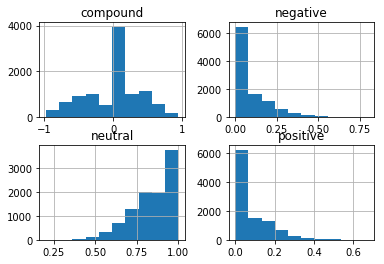

In [47]:
print (df1.hist())

It can be observed that maximum amount of statements are neutral as its compound value is 0, negative is 0, positive is 0 and neutral is 1.

In [48]:
neg = df['negative']
neu =df['neutral']
comp = df['compound']
pos =df['positive'] 
print ("Attribute","Positive","Negative","Compound","Neutral" )
print ("Max: \t", "{0:.2f} \t".format(pos.max()), "{0:.2f} \t".format(neg.max()), "{0:.2f}\t".format(comp.max()), "{0:.2f}\t".format(neu.max()))
print ("Min: \t", "{0:.2f} \t".format(pos.min()), "{0:.2f} \t".format(neg.min()), "{0:.2f}\t".format(comp.min()), "{0:.2f}\t".format(neu.min()))
print ("Avg: \t", "{0:.2f} \t".format(pos.mean()),"{0:.2f} \t".format(neg.mean()),"{0:.2f}\t".format(comp.mean()),"{0:.2f}\t".format(neu.mean()))
print ("Std.Devi", "{0:.2f} \t".format(pos.std()),  "{0:.2f} \t".format(neg.std()), "{0:.2f}\t".format(comp.std()), "{0:.2f}\t".format(neu.std()))

Attribute Positive Negative Compound Neutral
Max: 	 0.67 	 0.80 	 0.94	 1.00	
Min: 	 0.00 	 0.00 	 -0.97	 0.20	
Avg: 	 0.07 	 0.08 	 -0.01	 0.85	
Std.Devi 0.10 	 0.11 	 0.39	 0.14	


### Inference
-- Based on the information gained by skimming and scanning through different Fake news article and our dataset is that:
1. It can be said the statments which has the following sentiments are not fake news:
- compound = 0, 
- negative= 0, 
- positive = 0,
- neutral =  1

2. Fake news contains highly positve emotions or negative emotions.
Compound Score: The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 
- In our case we also have compound value. Negative emotions have compound value closure to -1 and positive have closure to 1.

#### Hence, we can conclude the below formula:
- if positive value is >0.75 or negative value is >0.75 or compound value is between (-0.75,0.75) can be suspected as fake news

In [49]:
### test function (non used)
value =0
for i in range(len(df)):
    if (df['negative'].iloc[i] > 0.75):
        if (df['compound'].iloc[i] < 0.75):
            value= 60*(df['negative'].iloc[i]+df['compound'].iloc[i])
            df['value'].iloc[i]=value
        else:
            value = 60* df['negative'].iloc[i]
            df['value'].iloc[i]=value
    elif (df['positive'].iloc[i]>0.75):
        if(df['compound'].iloc[i]>0.75):
            value= 40*(df['positive'].iloc[i]+df['compound'].iloc[i])
            df['value'].iloc[i]=value
        else:
            value = 40*df['positive'].iloc[i]
            df['value'].iloc[i]=value

/Users/vidhsharma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
### main sensationalism function
def Sensationalism(sentence):
    score = analyser.polarity_scores(sentence)
    final={}
    negative =score.get('neg')
    positive =score.get('pos')
    compund = score.get('compound')
    neutral =score.get('neu')
    final['negative'] = negative
    final['positive'] = positive
    final['compund'] = compund
    final ['neutral'] = neutral
    if (neutral == 1):
        value = 0
        
    elif (negative>0.7):
        value = negative
        
    elif (positive>0.7):
        value = positive
        
    elif ( neutral>0.65):
        value = (1-neutral)
        
    elif ( negative<0.7 and  positive<0.7 and (positive - negative>0)):
        value = (positive - negative)
        
    elif (  negative<0.7 and  positive<0.7 and  negative>0.4 and (positive - negative<0.5)  ):
        if(abs(compund)>negative):
            value = (1- abs(compund))
            
        else:
            value = (1- negative)
            
    else:
        value = abs(compund)
    final['sensationl_value'] = float('{:,.3f}'.format(value))
    #return final
    return value

In [55]:
sensational=[]
for i in df['statement']:
    result = (Sensationalism(i))
    sensational.append(result)
    print (i)
    print (result)
    print ("")

Says the Annies List political group supports third-trimester abortions on demand.
0.30800000000000005

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
0.09799999999999998

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
0.31299999999999994

Health care reform legislation is likely to mandate free sex change surgeries.
0.394

The economic turnaround started at the end of my term.
0

The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
0.16400000000000003

Jim Dunnam has not lived in the district he represents for years now.
0

I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
0.126

However, it took $19.5 million in Oregon Lott

0

What the Arizona law does is make a state crime out of something that already is... a federal crime.
0.31799999999999995

When the country was founded, Congress had exactly the same attitude about the sanctity of Christmas celebrations that a 7-Eleven does today: Yeah, were open.
0.08699999999999997

In Miami-Dade County, we spend at our school system over $20 million every year educating recent immigrants.
0

The omnibus bill has only $3.8 billion in earmarks.
0

Trump proposed enacting the largest tax increase in American history.
0.20399999999999996

Senator McCain has been talking tough about earmarks, and that's good, but earmarks account for about $18-billion of our budget.
0.15100000000000002

Kim Myers voted repeatedly to raise taxes on the people of Broome County, but made millions off of tax savings when her family business relocated its headquarters.
0

Californias Prop 60, which would requirecondom usein adult films, would put workers in the adult film industry at riskfo


We are one of only two states to have eight consecutive months of declining unemployment. Twenty-one states had increased unemployment last month. Ours went down.
0.264

Barack Obama wants to "unilaterally disarm our nation."
0

On an earmark moratorium.
0

Milwaukees problems include 52 percent black male unemployment.
0.31920000000000004

Rob Cornilles has disputed for two years a news story that said he said he would cut Social Security and Medicare programs before trimming the U.S. defense budget.
0.6369

Says Texas Railroad Commissioner Michael Williams has attended more than 150 tea party gatherings.
0.17200000000000004

Harry Reid has voted to give special tax breaks to illegal aliens.
0.2263

Job growth in the United States is now at the fastest pace in this countrys history.
0.278

When asked about equal pay for women, (Rubios) quote was that it was a waste of time.
0.23099999999999998

Atlanta has issued an increasing number of citations - and collected an increasing amount 


Health insurance is more expensive in Massachusetts than anywhere else in the country.
0

In two years, Gov. McAuliffe has vetoed more bills that the previous three governors issued in each of their four-year terms.
0

Everything I have said (on the campaign trail) has been factually accurate.
0

When Honduran children came into this country, Secretary Clinton said send them back.
0

Says Jeb Bush said low-income women should get their life together and find a husband.
0

Only about 6.8 percent of the (stimulus) money has actually been spent.
0

10 cents on thedollar from the Clinton Foundation goes to charitable causes.
0.19699999999999995

President Obama told people to skip coming here (Las Vegas) for conventions and meetings.
0

Says John Boehner admits we are not going to be any different than weve been by returning to the same failed economic policies that wrecked our economy.
0.18000000000000005

Newark is now home to one-third of all commercial and multi-family development.
0



Says under President Barack Obama, the debt increased by 23 percent, which was less than under any president going back to Ronald Reagan.
0.18000000000000005

The Secure Communities Program and 287(g) immigration programs were programs that worked but were recklessly gutted by the Obama administration.
0.08199999999999996

I spent only $36.29 on my campaign for governor.
0

Says that Susan Rice, the presidents national security adviser, has already conceded that Iran will have a robust uranium enrichment capability.
0.21099999999999997

Because theres no local option to allow communities to ban, limit or restrict the location of pot shops, if Amendment 2 passes you can expect the seedy elements of the pot industry to move in right next door to your neighborhood, your church, your business and even your childs school.
0.18600000000000005

With his decision on whether to fire Gen. Stanley McChrystal, President Obama has to fix yet another problem he inherited from the Bush administratio

0

In just six years, Georgia has dropped from first in the nation from a business-friendly legal climate to 24th.
0.08099999999999996

6.4 million more Americans living in poverty under President Obama.
0.268

Hillary Clinton is "willing to have workers' wages garnisheed if they refuse to buy health insurance."
0.128

We have less crime in the (Rio Grande) Valley than we do in other major Texas cities.
0.16700000000000004

Says, In the last four years weve cut $36 million in ongoing revenue.
0.14900000000000002

Financial conflict-of-interest laws dont apply to the president, right? So, the president doesnt have to have a blind trust.
0.273

Says nearly 1 million people are coming to town in the next 20 years.
0

The House health care bill pays for "about six years of program with a decade of revenue, with the heaviest costs concentrated in the second five years."
0.11299999999999999

It's just outrageous that under President Bush, the National Institutes of Health have been basically

0.31599999999999995

Obama spent "40 percent of the PAC money, 43 percent to be exact, on Iowa, New Hampshire, Nevada and South Carolina politicians."
0

For the first time in history, my administration posts our White House visitors online.
0

Says Texas ranks last in the percentage of residents with high school diplomas.
0

The climate hasnt warmed in quite a few years. That is proven scientifically.
0.14200000000000002

Says Bruce Springsteen played in 1975 at Seton Hall University in South Orange at Walsh gym.
0.138

In the fall of 2009, only 21 percent of Texas high school graduates enrolled in a four-year public university.
0

A North Carolina study proves that probably over a million people voted twice in (the 2012) election.
0

Tarpon Springs takes its homeless to St. Petersburg.
0

The overall fact about illegal immigration is that its not actually getting worse.
0.2607

Says Hillary Clinton has been in office and in government longer than anybody else running here tonight.
0


Brazil got off oil in the last 30 years.
0

Louisiana gets "not one single penny" from Gulf Coast offshore oil revenues.
0

We've heard talk about curbing our use of fossil fuels in nearly every State of the Union address since the oil embargo of 1973.
0

For the first time in U.S. history, a personal inaction will be deemed unlawful -- not purchasing a health-insurance plan
0.10499999999999998

American colleges amount to a cartel.
0

Louisiana is turning down $100 million "that would require us to change our unemployment law, that would have actually raised taxes on Louisiana businesses."
0.11199999999999999

Says he lived in a colonia while working as a farm worker.
0

Over the last 40 years, this countrys prison population has grown by 500 percent.
0.20199999999999996

While President Obama says all options are on the table for preventing a nuclear Iran, Hagel says military action is not a viable, feasible, responsible option.
0.122

Bernie Sanderss plan is to raise your taxes to 9

Says Texas legislators in 2011 increased state spending on education.
0.18899999999999995

While many of his colleagues turned down a $2,500 pay raise ... (Jeff) Plale pocketed the extra money.
0.07999999999999996

U.S. Sen. Kay Bailey Hutchison has voted nine separate times to raise the national debt ceiling.
0.14300000000000002

Things went wrong with the Medicare prescription D plan that George Bush rolled out.
0.20499999999999996

Child care costs in some states now exceed the average price tag for college tuition.
0.18600000000000005

U.S. Senate candidate Michelle Nunn has avoided taking a stand on Obamacare.
0.19399999999999995

There is debate among constitutional scholars about whether the First Amendment will continue to protect faith leaders from being forced to perform marriages against their religious beliefs.
0.259

Last year, American oil production reached its highest level since 2003.
0.123

The head of the FBI has told Congress they cannot vet those (Syrian) refugees.

It turns out that Texas has an $18 billion budget shortfall and cant afford its new science textbooks.
0

Says our taxes have doubled with Rick Perry in office.
0

Mike Martinez cut a deal with prosecutors to avoid facing possible jail time and stuck us with his $24,657.50 legal bill.
0.32799999999999996

Michelle Nunn spent most of her childhood in Perry, Ga.
0

On whether judges should be allowed to place children with gay couples who wish to adopt.
0.239

In total, we have added nearly 75,000 private sector jobs in New Jersey since we took office in January 2010.
0

Guantanamo detainees get taxpayer-paid-for prayer rugsthey had honey-glazed chicken and rice pilaf.
0

Mayor Barrett saved Milwaukee $25 million, thanks to Gov. Walkers reforms.
0.388

Says about 25 Texas cities and 39 states have banned texting while driving.
0.19999999999999996

Travis County now has the highest urban county tax rate in Texas.
0

Took on the Olympics and turned them around
0

Says 85 percent of IDEA ch

Wisconsins effective unemployment rate is 20 percent.
0.01799999999999996

The Milwaukee Police Department has seized nearly as many firearms this year as the much larger New York City Police Department.
0

Congresswoman Ros-Lehtinen has long record of voting against VA backlog fixes.
0

Among his (Obama's) pet projects is a bill ... which would commit the U.S. to spending 0.7 percent of gross national product on foreign aid.
0.19399999999999995

Says that under President Obama, theres been a substantial increase in federal government jobs.
0.272

We have the second highest corporate tax rate among our trading partners.
0

Says $1,100 of the tuition paid by every Oregon university student annually goes just to pay the costs of PERS.
0.06899999999999995

More than 32,000 Americans lose their lives to gun violence each year.
0.15190000000000003

On transportation financing
0

A bill to cap carbon emissions could cost Ohio 100,000 jobs.
0

I am the only candidate for lieutenant governor t


There are 3.6 million jobs sitting vacant, in part because there arent enough qualified applicants to fill them.
0

Last election, the Koch brothers spent three times what the top 10 unions spent combined.
0.11399999999999999

Obama unilaterally announced he was delaying employer mandate through a blog post by a mid-level bureaucrat at the Department of Treasury.
0.09099999999999997

John McCain says he never supported the privatization of Social Security, even though video shows he did.
0.22499999999999998

Say Bernie Sanders won Nevada after all.
0.381

Because of (U.S. Sen.-elect Ron) Johnsons leadership, Senate Republicans adopted a caucus ban on earmarks.
0.21699999999999997

Every dropout costs us $72,000 for the life of that person.
0

Says Donald Trump is going to go out and carpet bomb the Middle East.
0.19799999999999995

Most Americans want traditional marriage, as defined by the Defense of Marriage Act.
0.21899999999999997

In 2012, 1 in 4 Wisconsin schools had a subpar sc


Hillary [Clinton] wants to raise taxes by over a trillion dollars.
0

We are seeing dramatic rate cuts to Medicare that will affect seniors ability to keep their doctor, hospital and prevention services.
0.19099999999999995

We had a press conference here that interestingly no one in the mainstream media covered.
0.29000000000000004

As a student at Occidental College in Los Angeles from 1979 to 1981, there were days where folks couldnt go outside. because of all the pollution in the air.
0

Spanish was the first European language spoken in this country.
0

By one leading measure, what business owners pay out in wages and salaries is now finally growing faster than what they spend on health insurance for the first time in 17 years.
0.09399999999999997

If someone is in a room that has measles and leaves and you walk in two hours later, you could get measles from that person.
0

St. Pete Beachs local version of Amendment 4 resulted in seemingly endless lawsuits (that) decimated the cit

0

On immigration reform
0

The actions Im taking are the kinds of actions taken by every single Republican president and every single Democratic president for the past half-century.
0

It took us four years to balance the budget. Then I gave you four surplus budgets for the first time in more than 70 years, paid $600 billion down on the national debt.
0.07499999999999996

Says Jon Corzine gave away 14 percent raises over 4 years and he stood on the front steps of the Capitol at a public-sector union rally and said, I will fight to get you a great contract.
0.17800000000000005

Weve cut taxes 50 times and look what has happened to our revenues. Theyve grown.
0.13

Many dont know that Bill Young was once the minority leader in the Florida Senate...because he was the only Republican senator.
0

Says Barack Obama is the only American president who has not visited the D-Day Monument in Normandy on D-Day.
0

Says Oregon is one of only three states that allow the use of gillnets on inland wa

0.17200000000000004

$700 billion was robbed (from Medicare) to pay for Obamacare.
0.135

DUI arrests dropped significantly in Tampa once Uber began operating here.
0.22499999999999998

Tennessee students now cover about 67 percent of the cost of their education at public universities, and some 60 percent at community colleges.
0

On opposing any and all efforts to increase taxes.
0.22299999999999998

Regulations on developers have thwarted construction on county-owned land in Milwaukees downtown Park East corridor.
0.07299999999999995

Pediatricians have cut down on the number and proximity of vaccines because they recognize there have been too many in too short a period of time.
0.129

The health care reform plan being proposed in Congress would mean big tax increases.
0.19799999999999995

Marijuana today is genetically modified, with THC levels that far surpass the marijuana of the 1970s.
0

Says U.S. Rep. Patrick Murphy has sided with the GOP on key votes twice as often as he sided

Says he has "the most impressive education record" of the Republican candidates.
0.246

Obamacare is going to increase the divorce rate.
0.247

Many states without collective bargaining, such as Arizona, Nevada and North Carolina, have far larger budget deficits than many that do, including Ohio.
0

Senator Menendez said he would spend our money wisely. But our annual national deficit climbed from $250 billion a year to $1.6 trillion on his watch.
0.19199999999999995

Says Madison Mayor Paul Soglins stated intent when proposing that city contractors disclose private political donations was to discourage contributions to organizations with which he disagrees.
0.17500000000000004

A Republican bill that would change John Doe criminal investigations is creating exceptions in the law for politicians.
0.272

Says we allow more people into America legally than all other countries on the planet combined.
0.19099999999999995

By the end of 2015, more than 1,300 people will have died on Georgia

Today Russia holds many of our most precious national security satellites at risk before they ever get off the ground.
0.33999999999999997

Says Paul Ryan backs a proposal that would be a bailout of Puerto Rico.
0.20599999999999996

Religious groups like Knights of Columbus have been forced to allow same-sex marriage ceremonies in their facilities, against their beliefs.
0.30300000000000005

Says U.S. Senate opponent Tommy Thompson personally made over $3 million from a federal contract granted to his healthcare company, but left 9/11 first responders without the care they were promised.
0.23299999999999998

The Senate voted this week to allow illegal aliens access to Social Security benefits.
0.16100000000000003

In Iraq, civilian deaths, incidents of bombings, etc., remain very low relative to what was going on last year.
0.11699999999999999

Obamacare has caused millions of full-time jobs to become part-time.
0

In the period from 2007 to 2011, the Office of Health Insurance Commiss


Says New Jerseys prison system is 61 percent African-American even though our state is just 13 percent black.
0.16300000000000003

We are the only major country on Earth that doesnt guarantee health care to all people as a right.
0.21399999999999997

Do you know that, statistically, when you take the SAT a second time, one third of the people that take the SAT, even if theyve been studying, will get a lower score than they did the first time around?
0.05800000000000005

On HealthCare.Gov, Texan Mark Sullivan found a good health insurance plan that includes dental, for less than $80 a month.
0.14600000000000002

Sen. Obama has declared, and repeatedly reaffirmed his intention to meet the president of Iran without any preconditions.
0

We see a quarter-billion dollars in a pension fund that needs to be funded at $1.2 billion.
0

I'm proud to have had a 100 percent pro-life voting record.
0.256

Americans are 20 times as likely to die from gun violence as citizens of other civilized coun


Two-thirds of the federal budget is permanent law ... its permanently appropriated.
0

States with the most gun laws tend to have the fewest gun deaths.
0.32899999999999996

Says Obama broke his promise to help homeowners facing foreclosure.
0.045999999999999985

Most women, including 98 percent of Catholic women, have used contraception.
0

The average age of first marijuana use is 12.
0

The United States is 65th out of 142 nations and other territories on equal pay.
0.244

Ive never supported a payroll tax.
0.32899999999999996

Since Barack Obama became president of the United States, 95 percent of economic gains have been made by the richest 1 percent.
0.32299999999999995

Obama never held a single Senate hearing on Afghanistan.
0

On serving out his gubernatorial term
0

More people in this country have seen UFOs than I think approve of George Bush's presidency.
0

President Obama is a Muslim.
0

Says potential Democratic opponent Mary Burke implemented the policies of Jim Doyle.

0

Barack Obama will "raise Social Security taxes."
0.28600000000000003

Obesity kills 34 children per hour.
0.4577

Sherrod Brown sent billions of our tax dollars to foreign countries.
0

Says PolitiFact listed Governor Scott Walker of Wisconsin as the Governor who told the most lies and our own untruthful Governor Chris Christie made it into Politifacts top five of Lie - en Governors.
0.136

On whether President Obamas speeches to school children spread socialist ideology.
0

The number of jobs created and people lifted out of poverty during Bill Clintons presidency was a hundred times what it was under President Ronald Reagan.
0.23099999999999998

Already, the mayor of Green Bay is having ribbon-cutting after ribbon-cutting for economic development around the new VA center.
0

(Bill) McCollum also voted for numerous amendments to weaken the legislation, even voting to make trains less accessible to those in wheelchairs.
0.118

People want the minimum wage, they want marriage equalit

0.133

Says Gov. Rick Perry is spending Texans hard-earned money to live like Louie XIV.
0.16100000000000003

Congressman Duffy has long record of voting against VA backlog fixes.
0

There were fewer civilian casualties in Cambodia than there have been from American drone attacks.
0.17200000000000004

Trade deals threaten Indias role as the pharmacy of the developing world for new HIV medicines.
0.14800000000000002

By the word religion in the First Amendment, the founders meant Christianity.
0

NFL players are living, on average, longer than the average male.
0

Republican candidate for governor Nathan Deal explicitly voted to fund abortions ...
0

I won the majority of the Republican vote in both New Hampshire and South Carolina.
0.22199999999999998

Says Ralph Hall is the oldest member in Congress ever.
0

Fifteen out of the 20 most polluted cities in the world are in India and China.
0.18000000000000005

Says an investigative report concluded Ken Cuccinelli should have been prosecu

Obama is the Senate's "most liberal."
0

Three out of the 18 benchmarks of the (GAO) have been fulfilled. Even among Republican math, that is a failing grade.
0.253

The fiscal cliff deal ultimately raised taxes.
0

When President Barack Obama said ISIS, or ISIL, was contained, he was responding very specifically to the geographic expansion of ISIL in Iraq and Syria.
0

U.S. Olympic medal winners will owe up to $9,000 to the IRS.
0.383

Eleven years ago, the city of Detroit lifted the residency requirement for police officers and today, 53 percent of officers live outside of the city. If we want the tax base of Milwaukee to resemble the tax base of Detroit, this is the way to go.
0.028000000000000025

Texas is the fastest growing state with the most Fortune 500 companies.
0.134

There was a 57-percent decrease in fireworks-related injuries in 2000 [after Connecticut legalized sparklers] compared to the 14 years prior.
0

Look, the earmarks have come down significantly, 75 percent.
0

D

(array([4225., 2725., 2035.,  865.,  134.,   56.,   53.,   47.,   69.,
          31.]),
 array([0.     , 0.09633, 0.19266, 0.28899, 0.38532, 0.48165, 0.57798,
        0.67431, 0.77064, 0.86697, 0.9633 ]),
 <a list of 10 Patch objects>)

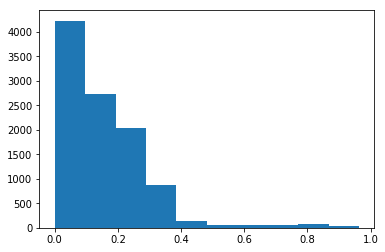

In [56]:
plt.hist(sensational)

In [57]:
test = Sensationalism('It was under Barack Obama and Hillary Clinton that changed the rules of engagement that probably cost (Capt. Humayun Khans) life.')
print (test)

0.13


##  Applying sensationalism function on testing dataset

In [ ]:
dfTest =pd.read_csv('../../liar-liar_dataset/test.tsv', sep='\t')

In [ ]:
dfTest.head(10)

In [ ]:
dfTest['statement'].head(10)

In [ ]:
polarityTest=[]
for i in dfTest['statement']:
    result = (Sensationalism(i))
    polarityTest.append(result)
    print (i)
    print (result)
    print ("")

In [ ]:
plt.hist(polarityTest)